In [179]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sp
import plotly.plotly as py
from plotly.graph_objs import * 
from sklearn import datasets, linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.decomposition import PCA

%matplotlib inline


# Introduction 
In this project ,i will discover some features that affect on house's price and create a model of linear regression to predict price of a house when have known those feature.

### 1/ Data exploration and cleaning.

In [117]:
# read CSV files
dt = pd.read_csv('D:\Melbourne_housing_FULL.csv')

In [118]:
dt.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [119]:
dt.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [120]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


From the describe of dt , we can see extraordinary in yearbuilt :minimum year is 1196 and maximum is 2106 while we are living in 2018.
I think this is the typing error and i will replace 1196 by 1996 and 2106 by 2016 .
And in the Landsize , have maximun is far from 75% ,the same for BuildingArea and Rooms.
Rooms and Bedroom2 are similarity in many feature:25,50,75% ,std, mean. I predict they have high corellation value.


In [121]:
dt.describe(include=['O']).T

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
Date,34857,78,28/10/2017,1119
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


From 2 describe tables, showed column have missing value is: CouncilArea,Regionname,Price,distance,postcode...
Address column have unique is 34009 different from 34857 => have 848 address repeat

In [122]:
dt[dt.CouncilArea.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These house have many column with null value so i will drop them 

In [123]:
dt.dropna(subset=['CouncilArea'], how='all',inplace=True)


In [124]:
dt[dt.Distance.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [125]:
dt[dt.Longtitude.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
27,Abbotsford,13/84 Trenerry Cr,1,u,500000.0,S,Biggin,12/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
33,Abbotsford,250 Langridge St,2,t,847000.0,S,Jellis,16/07/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
34,Abbotsford,16b Mollison St,2,h,NaN,PI,Biggin,16/07/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
45,Abbotsford,65/80 Trenerry Cr,1,u,480000.0,S,Biggin,19/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
46,Abbotsford,119/52 Nicholson St,1,u,423500.0,S,hockingstuart,22/05/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


In [126]:
dt[dt.Lattitude.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
27,Abbotsford,13/84 Trenerry Cr,1,u,500000.0,S,Biggin,12/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
33,Abbotsford,250 Langridge St,2,t,847000.0,S,Jellis,16/07/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
34,Abbotsford,16b Mollison St,2,h,NaN,PI,Biggin,16/07/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
45,Abbotsford,65/80 Trenerry Cr,1,u,480000.0,S,Biggin,19/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
46,Abbotsford,119/52 Nicholson St,1,u,423500.0,S,hockingstuart,22/05/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


In [127]:
dt[dt.Bedroom2.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
26,Abbotsford,22 Park St,4,h,1985000.0,S,Biggin,12/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,-37.8084,144.9942,Northern Metropolitan,4019.0
27,Abbotsford,13/84 Trenerry Cr,1,u,500000.0,S,Biggin,12/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
33,Abbotsford,250 Langridge St,2,t,847000.0,S,Jellis,16/07/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
34,Abbotsford,16b Mollison St,2,h,NaN,PI,Biggin,16/07/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
45,Abbotsford,65/80 Trenerry Cr,1,u,480000.0,S,Biggin,19/11/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


I will replace the all the null value by None except Bedroom2,Bathroom,Car,Distance and others float value by median
And remove the data where price is null

In [128]:
#replace null value by median of column or the 75% value
dt.loc[dt.Distance.isnull(), 'Distance'] =dt['Distance'].median()
dt.loc[dt.Postcode.isnull(), 'Postcode'] =3156
dt.loc[dt.Bedroom2.isnull(), 'Bedroom2'] =4
dt.loc[dt.Bathroom.isnull(), 'Bathroom'] =2
dt.loc[dt.Car.isnull(), 'Car'] =2
dt.loc[dt.Landsize.isnull(), 'Landsize'] =dt['Landsize'].median()
dt.loc[dt.BuildingArea.isnull(), 'BuildingArea'] =dt['BuildingArea'].median()
dt.loc[dt.YearBuilt.isnull(), 'YearBuilt'] =2000
dt.loc[dt.Lattitude.isnull(), 'Lattitude'] =dt['Lattitude'].median()
dt.loc[dt.Longtitude.isnull(), 'Longtitude'] =dt['Longtitude'].median()
dt.loc[dt.Propertycount.isnull(), 'Propertycount'] =10412
dt["YearBuilt"]=dt["YearBuilt"].apply(lambda x:str(x).replace("1196","1996"))
dt["YearBuilt"]=dt["YearBuilt"].apply(lambda x:str(x).replace("2106","2016"))
dt["CouncilArea"]=dt["CouncilArea"].apply(lambda x:str(x).replace(" City Council",""))
#And others object by None
dt = dt.astype(object).where(pd.notnull(dt),None)



In [129]:
dt.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

I will separate the name of street from address column 

In [130]:
dt['street'] = dt['Address'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

In [131]:
dt.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'street'],
      dtype='object')

In [132]:
dt.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,street
0,Abbotsford,68 Studley St,2,h,None,SS,Jellis,3/09/2016,2.5,3067,...,1,126,136,2000.0,Yarra,-37.8014,144.996,Northern Metropolitan,4019,Studley St
1,Abbotsford,85 Turner St,2,h,1.48e+06,S,Biggin,3/12/2016,2.5,3067,...,1,202,136,2000.0,Yarra,-37.7996,144.998,Northern Metropolitan,4019,Turner St
2,Abbotsford,25 Bloomburg St,2,h,1.035e+06,S,Biggin,4/02/2016,2.5,3067,...,0,156,79,1900.0,Yarra,-37.8079,144.993,Northern Metropolitan,4019,Bloomburg St
3,Abbotsford,18/659 Victoria St,3,u,None,VB,Rounds,4/02/2016,2.5,3067,...,1,0,136,2000.0,Yarra,-37.8114,145.012,Northern Metropolitan,4019,Victoria St
4,Abbotsford,5 Charles St,3,h,1.465e+06,SP,Biggin,4/03/2017,2.5,3067,...,0,134,150,1900.0,Yarra,-37.8093,144.994,Northern Metropolitan,4019,Charles St


In [133]:
dt['street'].value_counts()

Barkly St           146
High St             123
Toorak Rd            93
Dandenong Rd         88
Victoria St          79
Charles St           77
Station St           73
Nicholson St         71
Park St              71
Albert St            68
George St            67
Gordon St            66
The Avenue           66
Wellington St        65
Malvern Rd           65
St Kilda Rd          64
Thomas St            64
William St           63
North Rd             58
Elizabeth St         58
Riversdale Rd        56
Tennyson St          50
Church St            50
Canterbury Rd        50
York St              50
South Rd             49
Glenferrie Rd        49
Albion St            48
Oxford St            48
Bruce St             48
                   ... 
MacKellar Av          1
Bigola St             1
Walmer Av             1
Island Pl             1
Cherry Av             1
Bracken Wy            1
Daffodil Ct           1
A Dawson Av           1
Traydal Cl            1
Kirrum Cl             1
Rippon Gr       

I will change the street name to category type and transform to number to test the corellation with price.

In [134]:
dt["street"] = dt["street"].astype('category')
dt["street_code"] = dt["street"].cat.codes

In [135]:
dt.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,street,street_code
0,Abbotsford,68 Studley St,2,h,None,SS,Jellis,3/09/2016,2.5,3067,...,126,136,2000.0,Yarra,-37.8014,144.996,Northern Metropolitan,4019,Studley St,9991
1,Abbotsford,85 Turner St,2,h,1.48e+06,S,Biggin,3/12/2016,2.5,3067,...,202,136,2000.0,Yarra,-37.7996,144.998,Northern Metropolitan,4019,Turner St,10532
2,Abbotsford,25 Bloomburg St,2,h,1.035e+06,S,Biggin,4/02/2016,2.5,3067,...,156,79,1900.0,Yarra,-37.8079,144.993,Northern Metropolitan,4019,Bloomburg St,1850
3,Abbotsford,18/659 Victoria St,3,u,None,VB,Rounds,4/02/2016,2.5,3067,...,0,136,2000.0,Yarra,-37.8114,145.012,Northern Metropolitan,4019,Victoria St,10687
4,Abbotsford,5 Charles St,3,h,1.465e+06,SP,Biggin,4/03/2017,2.5,3067,...,134,150,1900.0,Yarra,-37.8093,144.994,Northern Metropolitan,4019,Charles St,2634


From the table , the type of house have only 3 variable , so i will use one hot encode to show them in numberical. 

In [136]:
dt = pd.get_dummies(dt, columns=['Type'])

### 2/ Visualization, interactions among features

In [137]:
dt.groupby('CouncilArea')['CouncilArea'].count()

CouncilArea
Banyule                         1861
Bayside                         1764
Boroondara                      3675
Brimbank                        1593
Cardinia Shire Council            41
Casey                            176
Darebin                         2851
Frankston                        290
Glen Eira                       2006
Greater Dandenong                314
Hobsons Bay                      942
Hume                            1214
Kingston                         871
Knox                             371
Macedon Ranges Shire Council      46
Manningham                      1046
Maribyrnong                     1451
Maroondah                        506
Melbourne                       1952
Melton                           292
Mitchell Shire Council            20
Monash                          1466
Moonee Valley                   1791
Moorabool Shire Council            7
Moreland                        2122
Nillumbik Shire Council           88
Port Phillip              

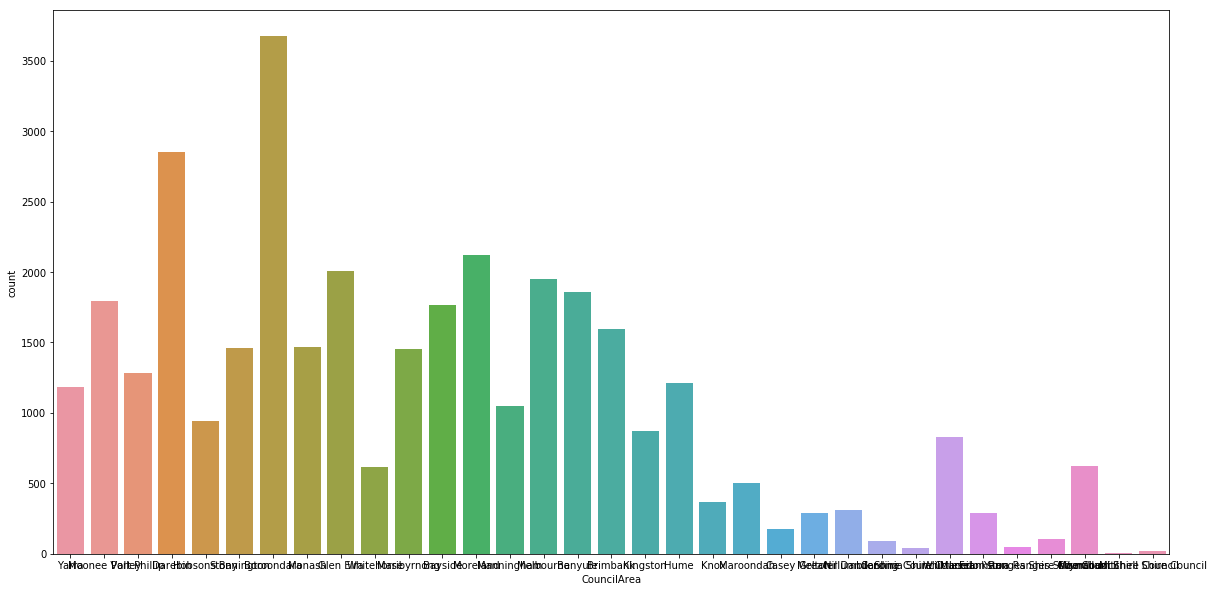

In [138]:
plt.figure(figsize=(20,10))
sb.countplot(dt['CouncilArea'])

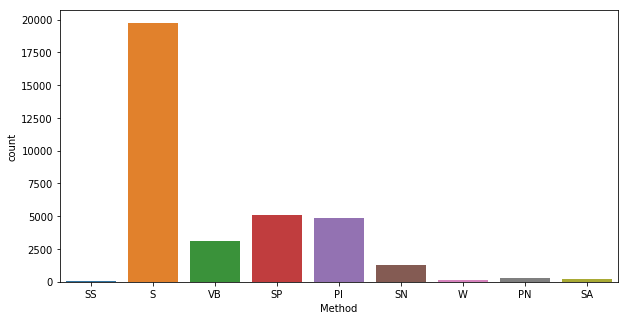

In [139]:
plt.figure(figsize=(10,5))
sb.countplot(dt['Method'])

From the graph and csv data, i see that for Method: SS,SN,W and PN the price are missing. 

In [140]:
data = [Bar(y=dt.Price,
            x=dt.Distance)]
layout = Layout(title="Price and Distance",
               barmode='stack')
fig = dict(data=data,layout=layout)

py.iplot(fig)

The draw time for this plot will be slow for clients without much RAM.


C:\Users\User\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



High price focus on the distance from 4 to 15 

In [141]:
dt = dt.apply(pd.to_numeric, errors='ignore')

In [142]:
dt.dtypes

Suburb            object
Address           object
Rooms              int64
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
street            object
street_code        int16
Type_h             uint8
Type_t             uint8
Type_u             uint8
dtype: object

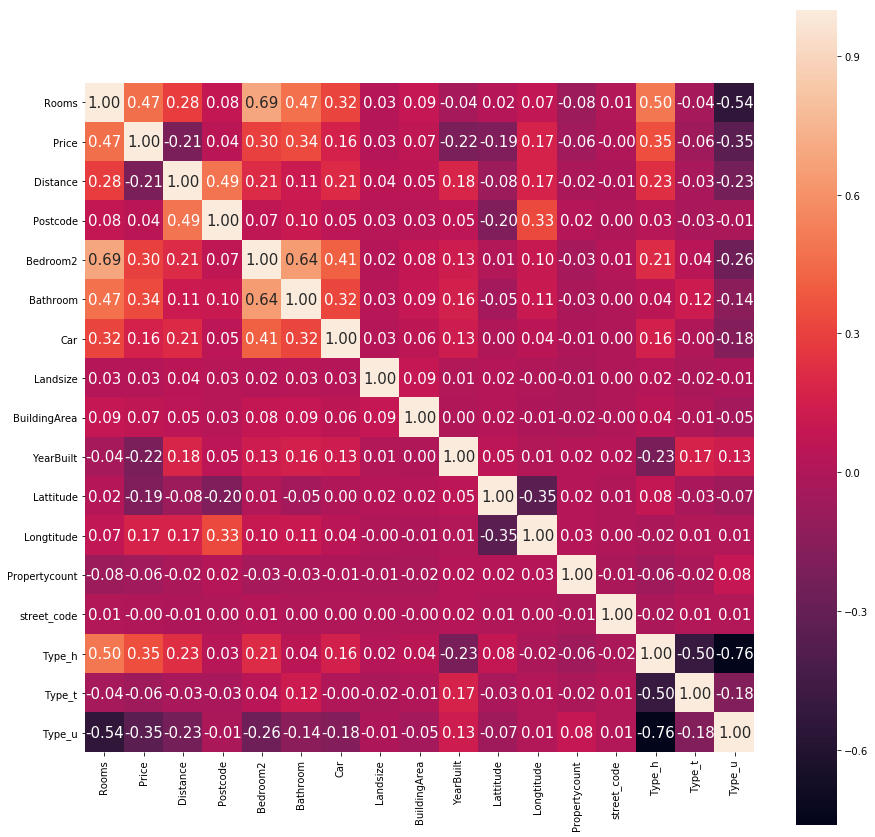

In [143]:
corr = dt[dt['Price'].notnull()].corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
        xticklabels=corr.columns,
        yticklabels=corr.columns)

From the graph of corelation , we can see which features have effected the price by correlation value.
count from bottom : Type_h,Lattitude,Yearbuilt,Bathrom,Rooms,Distance.
I don't take Bedroom2 because it have high corelation with Rooms
the same with Type_h and Type_u

### 3/ Linear regression with:
     3.1 holdout

In [144]:
feature_cols=['Type_h','Lattitude','YearBuilt','Bathroom','Rooms','Distance','Landsize']
dc=dt[dt['Price'].notnull()]
X=dc[feature_cols]
y=dc['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13622, 7) (13622,)
(13622, 7) (13622,)


I'm only use row with not null Price value to reduce the noise.

In [145]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)


-67096082.59276782
[ 3.33075430e+05 -1.88954872e+06 -2.11486531e+03  2.17267936e+05
  2.45122391e+05 -3.79223416e+04  1.87273132e+01]


In [146]:
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

473324.34235042904


Text(0,0.5,'Predictions')

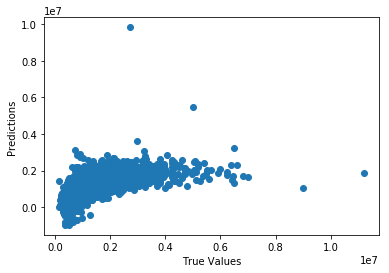

In [147]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

From the true and prediction graph , we can see that most of prediction value lower than real value 1000000 to 3000000
So i add 200000 to output prediction value to see what happen

Text(0,0.5,'Predictions')

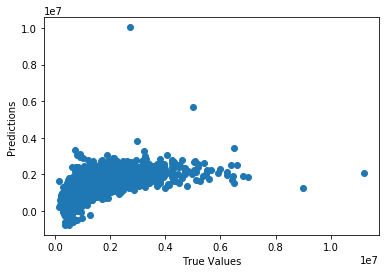

In [148]:
plt.scatter(y_test, y_pred+200000)
plt.xlabel("True Values")
plt.ylabel("Predictions")

the graph seem move toward the line of x=y

In [149]:
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred+200000)))

515852.4906770171


But the rms error are increase. This method better on the graph but increase the rms error

3.2/ Cross-validation.

In [168]:
feature_cols=['Type_h','Lattitude','YearBuilt','Bathroom','Rooms','Distance','Landsize']
dc=dt[dt['Price'].notnull()]
X=dc[feature_cols]
y=dc['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(13622, 7) (13622,)
(13622, 7) (13622,)


In [170]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)


-68023906.31374629
[ 3.50055492e+05 -1.91229384e+06 -2.06511904e+03  2.12391164e+05
  2.34855566e+05 -3.75867524e+04  4.66488808e+00]


Text(0,0.5,'Predictions')

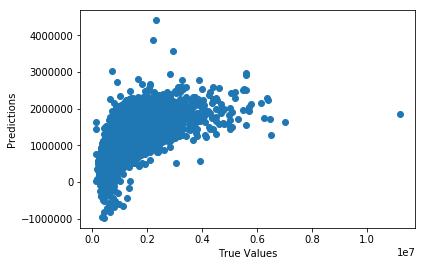

In [174]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [175]:
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

464176.2180944557


The graph and rms error are similar with holdout method

### 4/ Apply PCA
         4.1 holdout

In [244]:
feature_cols=['Type_h','Lattitude','YearBuilt','Bathroom','Rooms','Distance','Landsize']
dc=dt[dt['Price'].notnull()]
X=dc[feature_cols]
pca = PCA()
pca.fit(X)
X = pca.transform(X)


In [245]:
y=dc['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13622, 7) (13622,)
(13622, 7) (13622,)


In [246]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

1051640.555999123
[ 3.82057756e+00  4.87696866e+03  1.66956449e+04  3.66592638e+05
  1.91069118e+03 -2.53552497e+05 -1.87306238e+06]


Text(0,0.5,'Predictions')

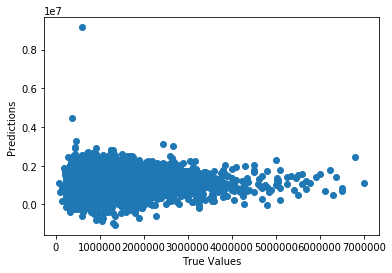

In [247]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

The plot is different with PCA, all the value seem placed in horizon line

In [249]:
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

461400.3587803945


RMS error not change much 

4.2 With cross validation.

In [256]:
y=dc['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13622, 7) (13622,)
(13622, 7) (13622,)


In [257]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

1058584.9925311885
[ 2.99438543e+01  4.89020646e+03  1.71160696e+04  3.65300873e+05
  1.10239522e+04 -2.56713651e+05 -1.88775173e+06]


Text(0,0.5,'Predictions')

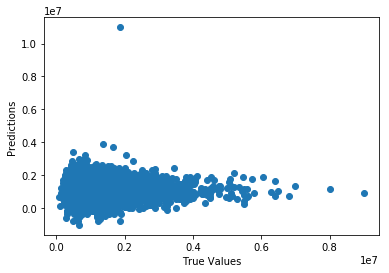

In [258]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

the graph are similar with PCA and holdout , I don't know if i'm do something wrong . the rms still stay the same

In [259]:
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

470166.4904438376


### 5/ Conclusion
After several experiments with linear regression and PCA , i have conclusion that PCA will take the output in better shape and linear regression sometime doesn't output the best value as we want , and strongly depend on feature that effect on price. 